<a href="https://colab.research.google.com/github/kwakpovwe/kwakpovwe/blob/main/Personalized_Churn_Prevention_Strategies_Implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

This dataset is randomly collected from an Iranian telecom companyâ€™s database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

In [8]:
#1) Install all Libraries (Pandas, nympy, Scikit-learn, Matplotlib, seaborn)

!pip install pandas

In [9]:
# 2. Load the file into a Data Frame
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd
Customer_ChurnDF = pd.read_csv('Customer_Churn.csv')

In [11]:
# 3. Viewing the Content of the data frame by calling its name

Customer_ChurnDF

Call  Failure  Complains  Subscription  Length Sex  Charge  Amount  \
0               8.0        0.0                  38.0   M             0.0   
1               0.0        0.0                  39.0   M             0.0   
2              10.0        0.0                  37.0   F             0.0   
3              10.0        0.0                  38.0   M             0.0   
4               3.0        0.0                  38.0   M             0.0   
...             ...        ...                   ...  ..             ...   
3145           21.0        0.0                  19.0   F             2.0   
3146           17.0        0.0                  17.0   F             1.0   
3147           13.0        0.0                  18.0   F             4.0   
3148            7.0        0.0                  11.0   F             2.0   
3149            8.0        1.0                  11.0   M             2.0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370              71.0               5.0   
1                318               5.0               7.0   
2               2453              60.0             359.0   
3               4198              66.0               1.0   
4               2393              58.0               2.0   
...              ...               ...               ...   
3145            6697             147.0              92.0   
3146            9237             177.0              80.0   
3147            3157              51.0              38.0   
3148            4695              46.0             222.0   
3149            1792              25.0               7.0   

      Distinct Called Numbers  Age Group  Tariff Plan  Status   Age  \
0                        17.0          3          1.0       1  30.0   
1                         4.0          2          1.0       2  25.0   
2                        24.0          3          1.0       1  30.0   
3                        35.0          1          1.0       1   NaN   
4                        33.0          1          1.0       1  15.0   
...                       ...        ...          ...     ...   ...   
3145                     44.0          2          2.0       1  25.0   
3146                     42.0          5          1.0       1  55.0   
3147                     21.0          3          1.0       1  30.0   
3148                     12.0          3          1.0       1  30.0   
3149                      9.0          3          1.0       1  30.0   

      Customer Value  Churn Education  
0            197.640      0   student  
1             46.035      0   student  
2           1536.520      0   student  
3            240.020      0   student  
4            145.805      0   student  
...              ...    ...       ...  
3145         721.980      0   student  
3146         261.210      0   Masters  
3147         280.320      0   Masters  
3148        1077.640      0   student  
3149         100.680      1  graduate  

[3150 rows x 16 columns]

In [12]:
# 4. Showing all elements using iloc

Customer_ChurnDF.iloc[:,:]

Call  Failure  Complains  Subscription  Length Sex  Charge  Amount  \
0               8.0        0.0                  38.0   M             0.0   
1               0.0        0.0                  39.0   M             0.0   
2              10.0        0.0                  37.0   F             0.0   
3              10.0        0.0                  38.0   M             0.0   
4               3.0        0.0                  38.0   M             0.0   
...             ...        ...                   ...  ..             ...   
3145           21.0        0.0                  19.0   F             2.0   
3146           17.0        0.0                  17.0   F             1.0   
3147           13.0        0.0                  18.0   F             4.0   
3148            7.0        0.0                  11.0   F             2.0   
3149            8.0        1.0                  11.0   M             2.0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370              71.0               5.0   
1                318               5.0               7.0   
2               2453              60.0             359.0   
3               4198              66.0               1.0   
4               2393              58.0               2.0   
...              ...               ...               ...   
3145            6697             147.0              92.0   
3146            9237             177.0              80.0   
3147            3157              51.0              38.0   
3148            4695              46.0             222.0   
3149            1792              25.0               7.0   

      Distinct Called Numbers  Age Group  Tariff Plan  Status   Age  \
0                        17.0          3          1.0       1  30.0   
1                         4.0          2          1.0       2  25.0   
2                        24.0          3          1.0       1  30.0   
3                        35.0          1          1.0       1   NaN   
4                        33.0          1          1.0       1  15.0   
...                       ...        ...          ...     ...   ...   
3145                     44.0          2          2.0       1  25.0   
3146                     42.0          5          1.0       1  55.0   
3147                     21.0          3          1.0       1  30.0   
3148                     12.0          3          1.0       1  30.0   
3149                      9.0          3          1.0       1  30.0   

      Customer Value  Churn Education  
0            197.640      0   student  
1             46.035      0   student  
2           1536.520      0   student  
3            240.020      0   student  
4            145.805      0   student  
...              ...    ...       ...  
3145         721.980      0   student  
3146         261.210      0   Masters  
3147         280.320      0   Masters  
3148        1077.640      0   student  
3149         100.680      1  graduate  

[3150 rows x 16 columns]

In [13]:
# 5. Showing the first, second, and third column

Customer_ChurnDF.iloc[:,0:3]

Call  Failure  Complains  Subscription  Length
0               8.0        0.0                  38.0
1               0.0        0.0                  39.0
2              10.0        0.0                  37.0
3              10.0        0.0                  38.0
4               3.0        0.0                  38.0
...             ...        ...                   ...
3145           21.0        0.0                  19.0
3146           17.0        0.0                  17.0
3147           13.0        0.0                  18.0
3148            7.0        0.0                  11.0
3149            8.0        1.0                  11.0

[3150 rows x 3 columns]

In [14]:
# 6. Returning the Customer Value of the Dataset

Customer_ChurnDF['Customer Value']

0        197.640
1         46.035
2       1536.520
3        240.020
4        145.805
          ...   
3145     721.980
3146     261.210
3147     280.320
3148    1077.640
3149     100.680
Name: Customer Value, Length: 3150, dtype: float64

In [15]:
# Drop the "Status" and "Education" variables
Customer_ChurnDF = Customer_ChurnDF.drop(['Status', 'Education'], axis=1)

# Display the updated dataset
Customer_ChurnDF

Call  Failure  Complains  Subscription  Length Sex  Charge  Amount  \
0               8.0        0.0                  38.0   M             0.0   
1               0.0        0.0                  39.0   M             0.0   
2              10.0        0.0                  37.0   F             0.0   
3              10.0        0.0                  38.0   M             0.0   
4               3.0        0.0                  38.0   M             0.0   
...             ...        ...                   ...  ..             ...   
3145           21.0        0.0                  19.0   F             2.0   
3146           17.0        0.0                  17.0   F             1.0   
3147           13.0        0.0                  18.0   F             4.0   
3148            7.0        0.0                  11.0   F             2.0   
3149            8.0        1.0                  11.0   M             2.0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370              71.0               5.0   
1                318               5.0               7.0   
2               2453              60.0             359.0   
3               4198              66.0               1.0   
4               2393              58.0               2.0   
...              ...               ...               ...   
3145            6697             147.0              92.0   
3146            9237             177.0              80.0   
3147            3157              51.0              38.0   
3148            4695              46.0             222.0   
3149            1792              25.0               7.0   

      Distinct Called Numbers  Age Group  Tariff Plan   Age  Customer Value  \
0                        17.0          3          1.0  30.0         197.640   
1                         4.0          2          1.0  25.0          46.035   
2                        24.0          3          1.0  30.0        1536.520   
3                        35.0          1          1.0   NaN         240.020   
4                        33.0          1          1.0  15.0         145.805   
...                       ...        ...          ...   ...             ...   
3145                     44.0          2          2.0  25.0         721.980   
3146                     42.0          5          1.0  55.0         261.210   
3147                     21.0          3          1.0  30.0         280.320   
3148                     12.0          3          1.0  30.0        1077.640   
3149                      9.0          3          1.0  30.0         100.680   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3145      0  
3146      0  
3147      0  
3148      0  
3149      1  

[3150 rows x 14 columns]

In [16]:
 #Run the dataset.describe()

Customer_ChurnDF.describe()


Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3149.000000  3149.000000           3147.000000     3149.000000   
mean        7.626548     0.076215             32.538290        0.942204   
std         7.264621     0.265383              8.576164        1.520871   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             29.500000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3142.000000       3142.000000   
mean      4472.459683         69.493635         73.141311   
std       4197.908687         57.382554        112.305082   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan          Age  \
count              3144.000000  3150.000000  3148.000000  3148.000000   
mean                 23.509224     2.826032     1.077827    31.005400   
std                  17.220471     0.892555     0.267942     8.828646   
min                   0.000000     1.000000     1.000000    15.000000   
25%                  10.000000     2.000000     1.000000    25.000000   
50%                  21.000000     3.000000     1.000000    30.000000   
75%                  34.000000     3.000000     1.000000    30.000000   
max                  97.000000     5.000000     2.000000    55.000000   

       Customer Value        Churn  
count     3148.000000  3150.000000  
mean       471.169941     0.157143  
std        517.120402     0.363993  
min          0.000000     0.000000  
25%        113.780000     0.000000  
50%        228.520000     0.000000  
75%        788.827500     0.000000  
max       2165.280000     1.000000

In [17]:
#Run the dataset.describe()

description = Customer_ChurnDF.describe()

# apply color gradient to the columns
description_styled = description.style.background_gradient()

# display the styled output
description_styled

In [18]:
# Define the colors for the gradient
color_map = 'RdYlGn'

# Apply the gradient to the Churn column
churn_colored = Customer_ChurnDF.style.background_gradient(subset=['Churn'], cmap=color_map)

# Display the styled output
churn_colored

In [19]:
#12. Checking for Missing values using .isnull()

Customer_ChurnDF.isnull().sum()

Call  Failure                1
Complains                    1
Subscription  Length         3
Sex                        102
Charge  Amount               1
Seconds of Use               0
Frequency of use             8
Frequency of SMS             8
Distinct Called Numbers      6
Age Group                    0
Tariff Plan                  2
Age                          2
Customer Value               2
Churn                        0
dtype: int64

In [20]:
#Use the mean Strategy to replace the Missing Value

Customer_ChurnDF.fillna(Customer_ChurnDF.mean(), inplace=True)

<ipython-input-20-a6ba8a9245b3>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Customer_ChurnDF.fillna(Customer_ChurnDF.mean(), inplace=True)


In [21]:
# 14. Use Median to fill in the Null Values

Customer_ChurnDF.fillna(Customer_ChurnDF.median(), inplace=True)

<ipython-input-21-ec1bcae18d89>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Customer_ChurnDF.fillna(Customer_ChurnDF.median(), inplace=True)


In [22]:
# 15. For categorical variables use most frequent and constant technique to fill Missing Values
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy='most_frequent')
Customer_ChurnDF['Sex'] = imputer.fit_transform(Customer_ChurnDF[['Sex',]])

In [24]:
# 16. Checking for Missing values using .isnull()
#From the display below, there is no more missing value for the Dataset

Customer_ChurnDF.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Sex                        0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [25]:
#17. Install Scikit
!pip install scikit-learn

In [26]:
#18. Convert all Categorical features to integer codes using either OrdinalEncoder or OnehotEncoder using preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [27]:
enc = OrdinalEncoder()
Customer_ChurnDF['Sex'] = enc.fit_transform(Customer_ChurnDF[['Sex']])

Customer_ChurnDF

Call  Failure  Complains  Subscription  Length  Sex  Charge  Amount  \
0               8.0        0.0                  38.0  1.0             0.0   
1               0.0        0.0                  39.0  1.0             0.0   
2              10.0        0.0                  37.0  0.0             0.0   
3              10.0        0.0                  38.0  1.0             0.0   
4               3.0        0.0                  38.0  1.0             0.0   
...             ...        ...                   ...  ...             ...   
3145           21.0        0.0                  19.0  0.0             2.0   
3146           17.0        0.0                  17.0  0.0             1.0   
3147           13.0        0.0                  18.0  0.0             4.0   
3148            7.0        0.0                  11.0  0.0             2.0   
3149            8.0        1.0                  11.0  1.0             2.0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370              71.0               5.0   
1                318               5.0               7.0   
2               2453              60.0             359.0   
3               4198              66.0               1.0   
4               2393              58.0               2.0   
...              ...               ...               ...   
3145            6697             147.0              92.0   
3146            9237             177.0              80.0   
3147            3157              51.0              38.0   
3148            4695              46.0             222.0   
3149            1792              25.0               7.0   

      Distinct Called Numbers  Age Group  Tariff Plan      Age  \
0                        17.0          3          1.0  30.0000   
1                         4.0          2          1.0  25.0000   
2                        24.0          3          1.0  30.0000   
3                        35.0          1          1.0  31.0054   
4                        33.0          1          1.0  15.0000   
...                       ...        ...          ...      ...   
3145                     44.0          2          2.0  25.0000   
3146                     42.0          5          1.0  55.0000   
3147                     21.0          3          1.0  30.0000   
3148                     12.0          3          1.0  30.0000   
3149                      9.0          3          1.0  30.0000   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3145         721.980      0  
3146         261.210      0  
3147         280.320      0  
3148        1077.640      0  
3149         100.680      1  

[3150 rows x 14 columns]

In [28]:
# 18. Import SimpleImputer class from sklearn.impute library
from sklearn.impute import SimpleImputer

In [29]:
# 19. Standardization of the data using preprocessing and Standardization utility class or MinMaxscaler
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
Customer_ChurnDF_scaled = scaler.fit_transform(Customer_ChurnDF)


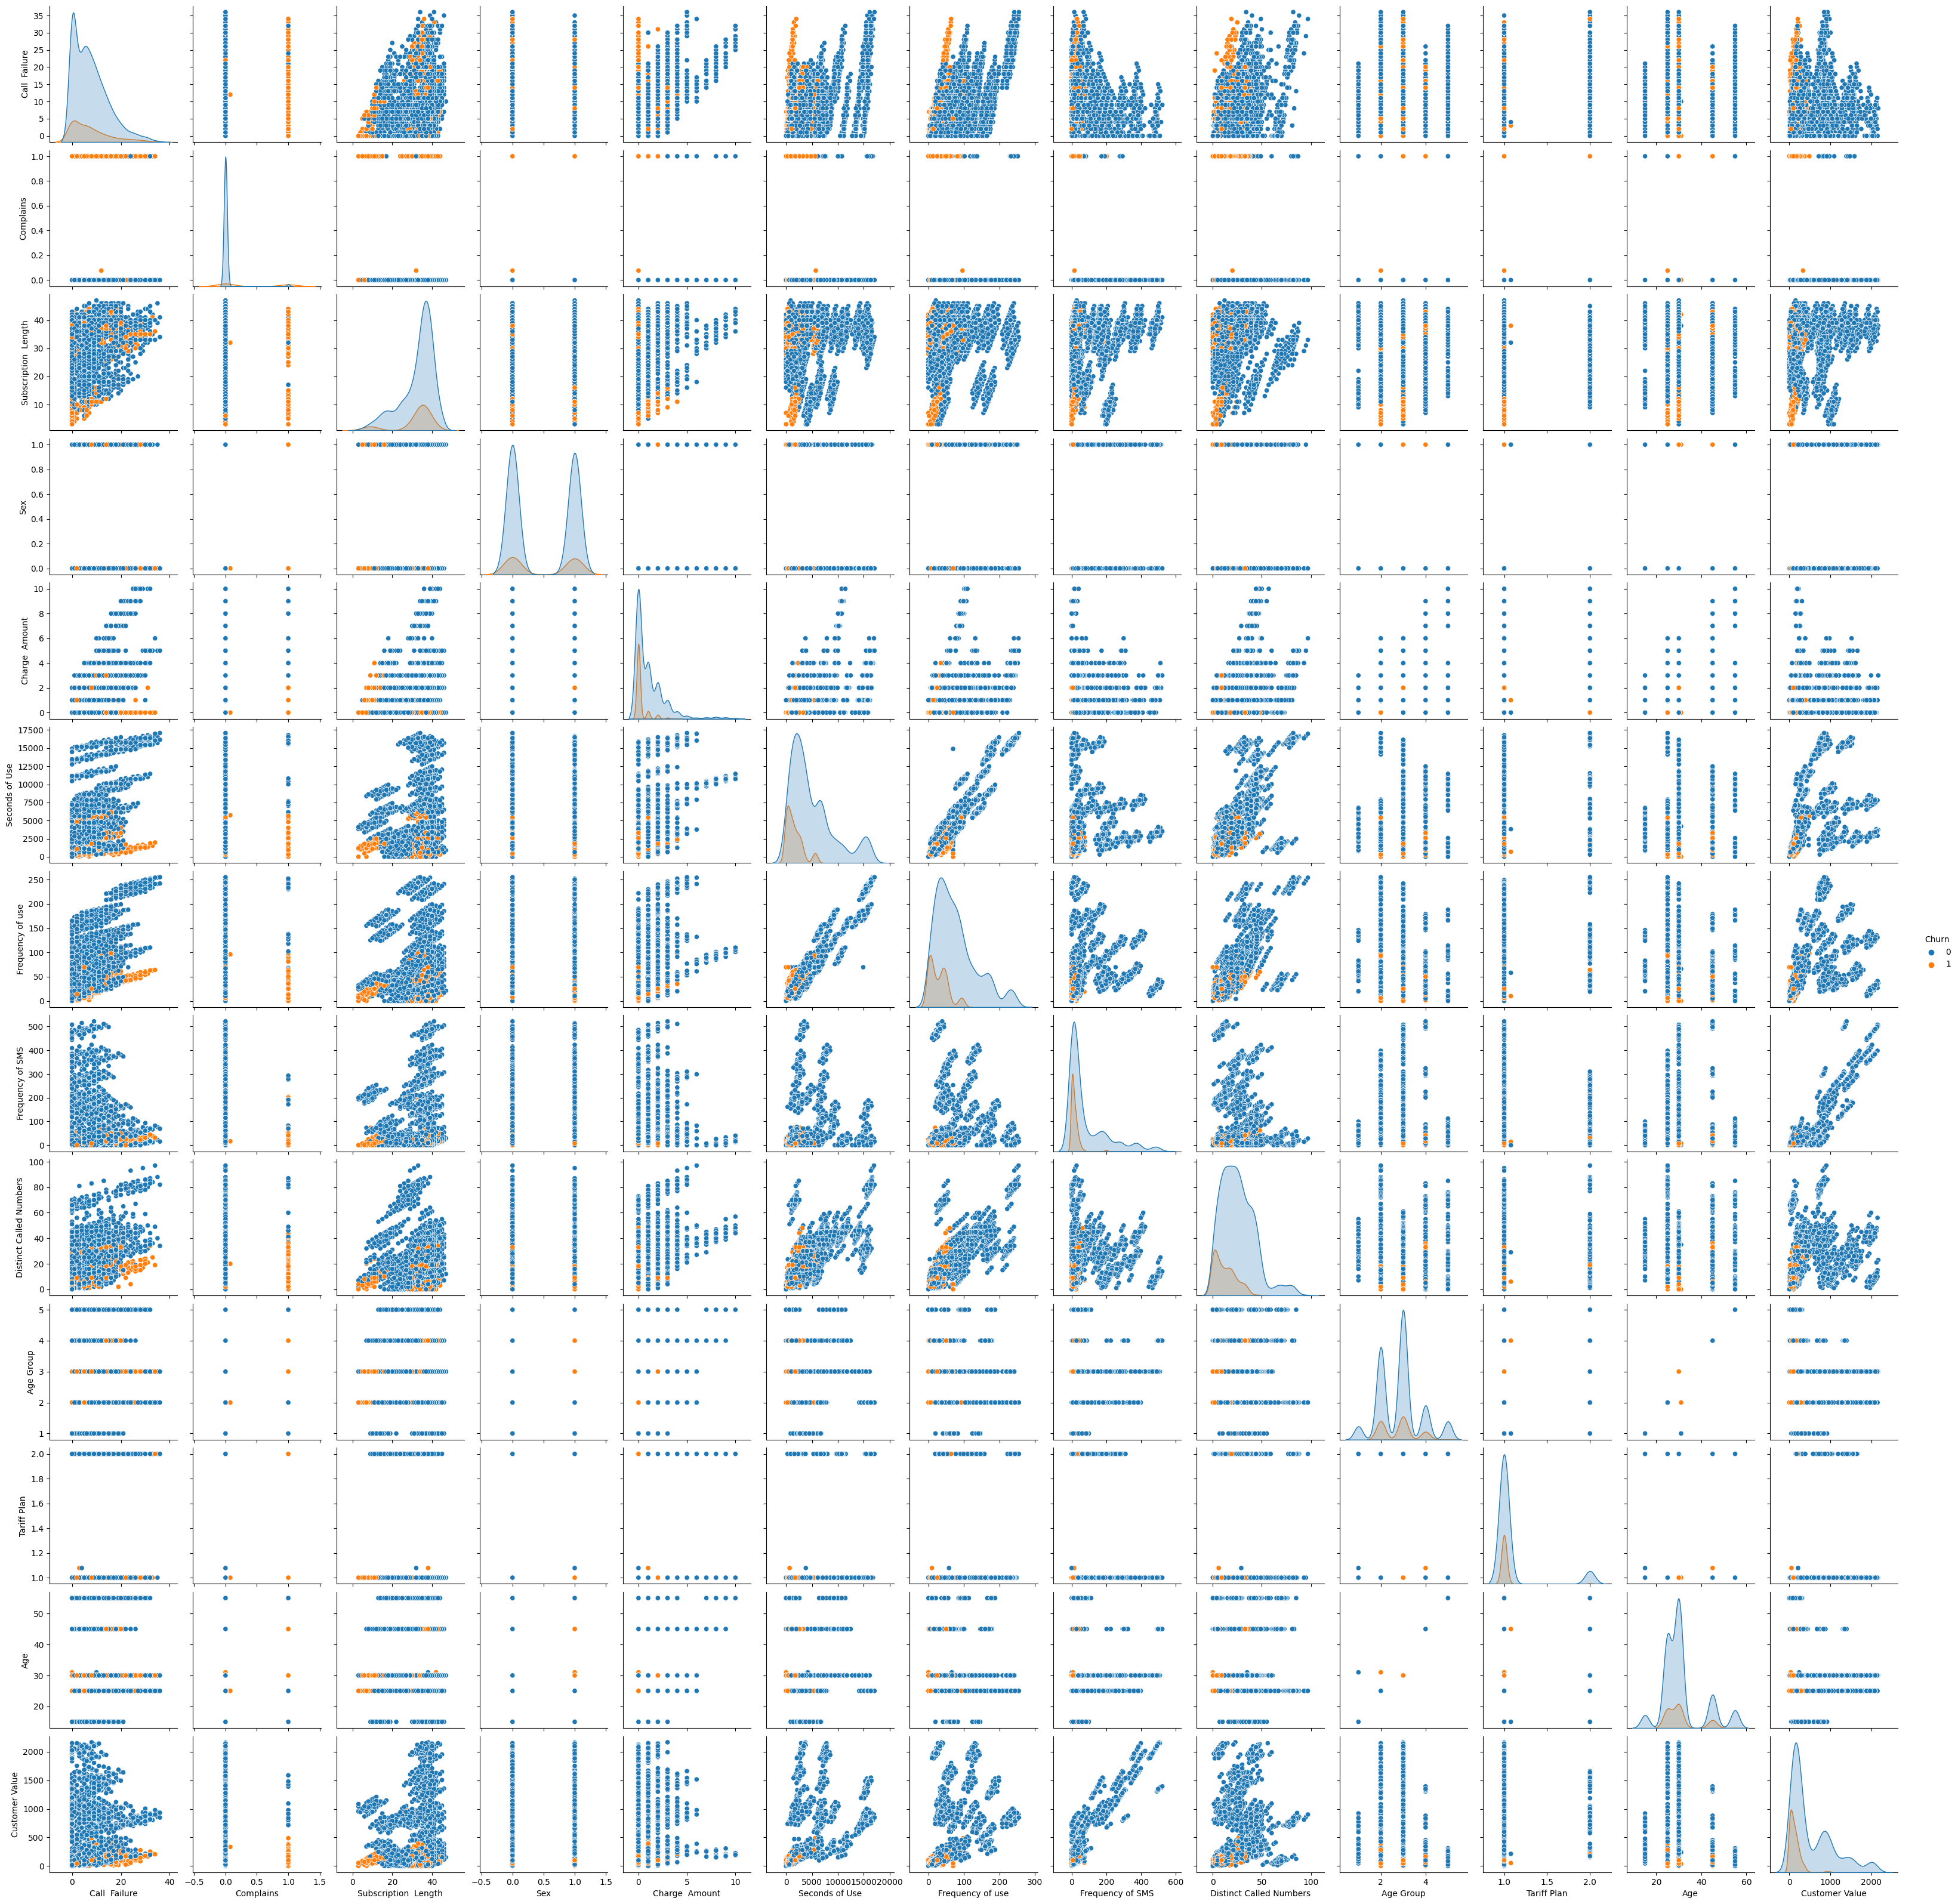

In [31]:
#Visualize the relationship between different variables and churn using Seaborn to provide plot types useful for statistical data exploration

import seaborn as sns
sns.pairplot(Customer_ChurnDF, hue='Churn')

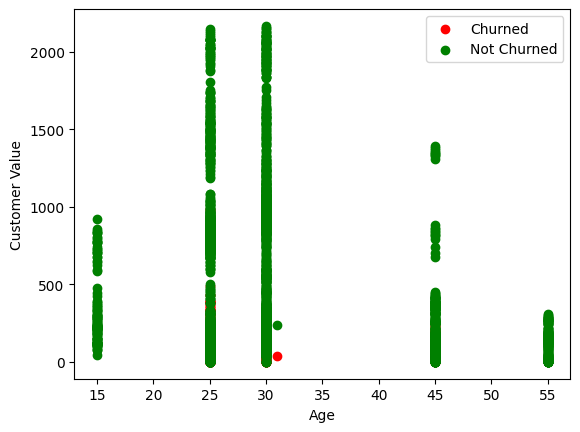

In [32]:
#Generate queries from the Dataset using the class target label and plot their visualization

import matplotlib.pyplot as plt
churned = Customer_ChurnDF[Customer_ChurnDF['Churn'] == 1]
not_churned = Customer_ChurnDF[Customer_ChurnDF['Churn'] == 0]
plt.scatter(churned['Age'], churned['Customer Value'], color='red', label='Churned')
plt.scatter(not_churned['Age'], not_churned['Customer Value'], color='green', label='Not Churned')
plt.xlabel('Age')
plt.ylabel('Customer Value')
plt.legend()
plt.show()

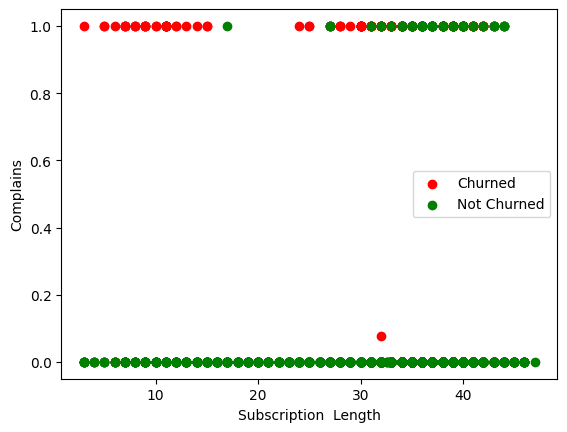

In [33]:
import matplotlib.pyplot as plt

churned = Customer_ChurnDF[Customer_ChurnDF['Churn'] == 1]
not_churned = Customer_ChurnDF[Customer_ChurnDF['Churn'] == 0]

plt.scatter(churned['Subscription  Length'], churned['Complains'], color='red', label='Churned')
plt.scatter(not_churned['Subscription  Length'], not_churned['Complains'], color='green', label='Not Churned')

plt.xlabel('Subscription  Length')
plt.ylabel('Complains')

plt.legend()
plt.show()

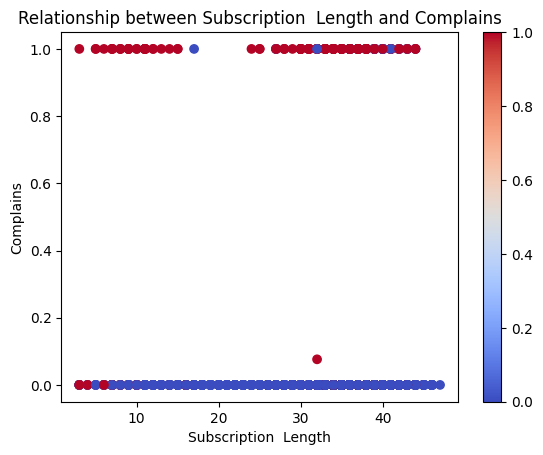

In [34]:
import matplotlib.pyplot as plt

# Create a scatter plot of Subscription Length vs. Complains
plt.scatter(Customer_ChurnDF['Subscription  Length'],Customer_ChurnDF['Complains'], c=Customer_ChurnDF['Churn'], cmap='coolwarm')

# Add labels and title to the plot
plt.xlabel('Subscription  Length')
plt.ylabel('Complains')
plt.title('Relationship between Subscription  Length and Complains')

# Add a colorbar to the plot
plt.colorbar()

# Show the plot
plt.show()

In [35]:
#Train the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [36]:
#splitting the X and y data into training and testing sets using the train_test_split() function from the sklearn.model_selection module.

X = Customer_ChurnDF.drop('Churn', axis=1)
y = Customer_ChurnDF['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [39]:
# K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

 1) Use the confusion_matrix function to generate a confusion matrix using our generated predictions (y_pred) and the true class labels for the test data (y_test) and use a seaborn heatmap to visualize these results.

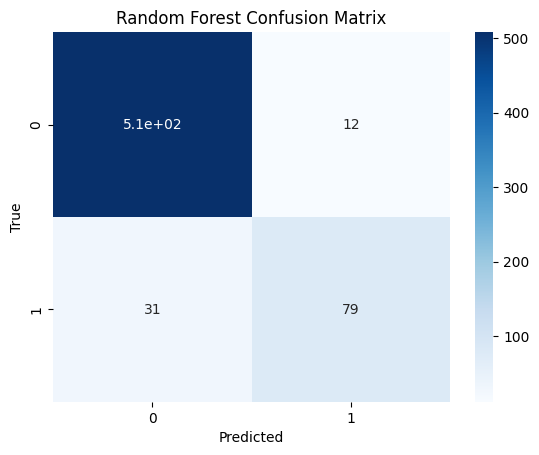

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

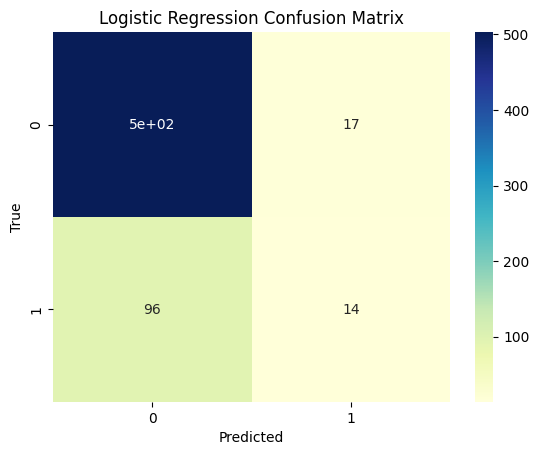

In [41]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='YlGnBu')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

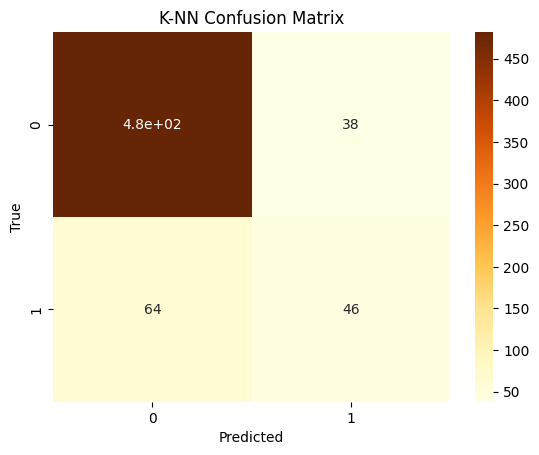

In [42]:
# K-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='YlOrBr')  # Change the cmap parameter to 'YlOrBr'
plt.title('K-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

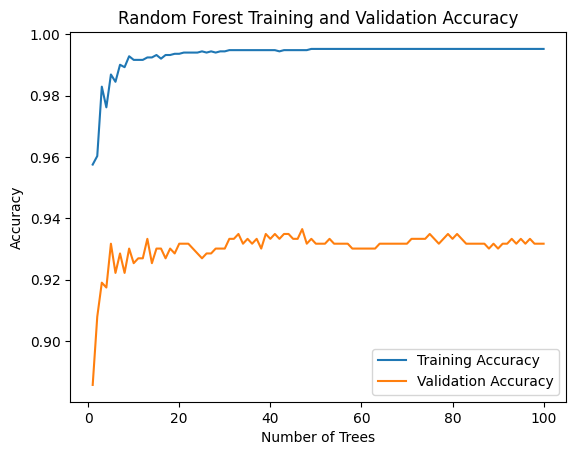

In [43]:
#Once the training has completed, plot the training and validation accuracy

from sklearn.metrics import accuracy_score
import numpy as np

# Random Forest
train_acc_rf = []
val_acc_rf = []
for i in range(1, 101):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_train_rf = rf.predict(X_train)
    y_pred_val_rf = rf.predict(X_test)
    train_acc_rf.append(accuracy_score(y_train, y_pred_train_rf))
    val_acc_rf.append(accuracy_score(y_test, y_pred_val_rf))

plt.plot(np.arange(1, 101), train_acc_rf, label='Training Accuracy')
plt.plot(np.arange(1, 101), val_acc_rf, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Training and Validation Accuracy')
plt.legend()
plt.show()

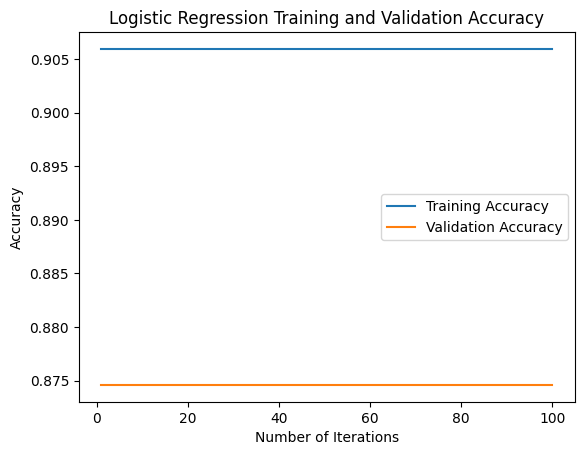

In [44]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
train_acc_lr = []
val_acc_lr = []
for i in range(1, 101):
    lr = LogisticRegression(random_state=42, max_iter=1000)  # Increase the max_iter parameter
    lr.fit(X_train_scaled, y_train)
    y_pred_train_lr = lr.predict(X_train_scaled)
    y_pred_val_lr = lr.predict(X_test_scaled)
    train_acc_lr.append(accuracy_score(y_train, y_pred_train_lr))
    val_acc_lr.append(accuracy_score(y_test, y_pred_val_lr))

plt.plot(np.arange(1, 101), train_acc_lr, label='Training Accuracy')
plt.plot(np.arange(1, 101), val_acc_lr, label='Validation Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Training and Validation Accuracy')
plt.legend()
plt.show()

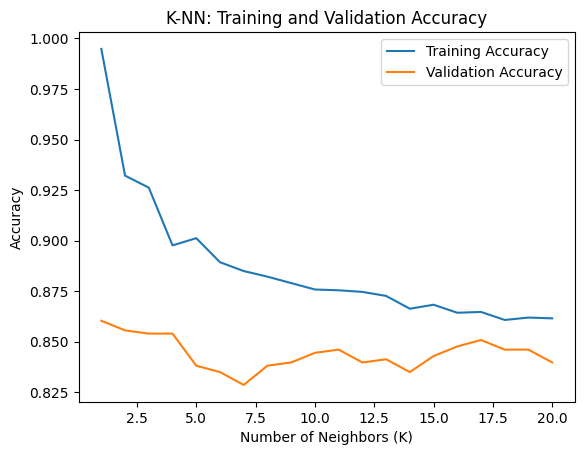

In [45]:
# K-NN
train_acc_knn = []
val_acc_knn = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train_knn = knn.predict(X_train)
    y_pred_val_knn = knn.predict(X_test)
    train_acc_knn.append(accuracy_score(y_train, y_pred_train_knn))
    val_acc_knn.append(accuracy_score(y_test, y_pred_val_knn))

plt.plot(np.arange(1, 21), train_acc_knn, label='Training Accuracy')
plt.plot(np.arange(1, 21), val_acc_knn, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K-NN: Training and Validation Accuracy')
plt.legend()
plt.show()

In [46]:
# 16. Model evaluation for the three Models- Random forest, Regression and K-NN) and include the classification report for Precision, Recall, F1-score

from sklearn.metrics import classification_report

# Random Forest
y_pred_rf = rf.predict(X_test)
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       520
           1       0.87      0.72      0.79       110

    accuracy                           0.93       630
   macro avg       0.91      0.85      0.87       630
weighted avg       0.93      0.93      0.93       630



In [47]:
print('K-NN Classification Report:')
print(classification_report(y_test, y_pred_knn))

K-NN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       520
           1       0.55      0.42      0.47       110

    accuracy                           0.84       630
   macro avg       0.72      0.67      0.69       630
weighted avg       0.82      0.84      0.83       630



In [48]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       520
           1       0.45      0.13      0.20       110

    accuracy                           0.82       630
   macro avg       0.65      0.55      0.55       630
weighted avg       0.77      0.82      0.78       630



# # Churn Implementation Strategies

In [49]:
# 18. Sort the customers by their churn probability
Customer_ChurnDF['Churn Probability'] = rf.predict_proba(X)[:, 1]
Customer_ChurnDF_sorted = Customer_ChurnDF.sort_values(by='Churn Probability', ascending=False)
Customer_ChurnDF_sorted

Call  Failure  Complains  Subscription  Length  Sex  Charge  Amount  \
3149            8.0        1.0                  11.0  1.0             2.0   
418             0.0        1.0                  34.0  0.0             0.0   
2126           14.0        1.0                  37.0  1.0             0.0   
2078            0.0        1.0                  34.0  1.0             0.0   
2076            4.0        1.0                  33.0  1.0             0.0   
...             ...        ...                   ...  ...             ...   
1784            0.0        0.0                  32.0  0.0             2.0   
1783           18.0        0.0                  29.0  0.0             2.0   
1782            0.0        0.0                  34.0  0.0             0.0   
1780            0.0        0.0                  31.0  1.0             0.0   
0               8.0        0.0                  38.0  1.0             0.0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
3149            1792              25.0               7.0   
418                0               0.0               0.0   
2126            3295              47.0              16.0   
2078               0               0.0               0.0   
2076            2685              35.0               2.0   
...              ...               ...               ...   
1784            6470             109.0             255.0   
1783           15580             231.0               0.0   
1782               0               0.0               0.0   
1780            6290              90.0               0.0   
0               4370              71.0               5.0   

      Distinct Called Numbers  Age Group  Tariff Plan   Age  Customer Value  \
3149                      9.0          3          1.0  30.0         100.680   
418                       0.0          2          1.0  25.0           0.000   
2126                     18.0          3          1.0  30.0         197.680   
2078                      0.0          3          1.0  30.0           0.000   
2076                     14.0          2          1.0  25.0         131.400   
...                       ...        ...          ...   ...             ...   
1784                     28.0          2          2.0  25.0        1443.555   
1783                     75.0          2          1.0  25.0         711.495   
1782                      0.0          5          1.0  55.0           0.000   
1780                     17.0          4          1.0  45.0         159.500   
0                        17.0          3          1.0  30.0         197.640   

      Churn  Churn Probability  
3149      1                1.0  
418       1                1.0  
2126      1                1.0  
2078      1                1.0  
2076      1                1.0  
...     ...                ...  
1784      0                0.0  
1783      0                0.0  
1782      0                0.0  
1780      0                0.0  
0         0                0.0  

[3150 rows x 15 columns]

In [50]:
 #19. Identify the top 10% of customers with the highest churn probability

top_10_percent = int(len(Customer_ChurnDF_sorted) * 0.1)
top_10 = Customer_ChurnDF_sorted.head(top_10_percent)
top_10

Call  Failure  Complains  Subscription  Length  Sex  Charge  Amount  \
3149            8.0        1.0                  11.0  1.0             2.0   
418             0.0        1.0                  34.0  0.0             0.0   
2126           14.0        1.0                  37.0  1.0             0.0   
2078            0.0        1.0                  34.0  1.0             0.0   
2076            4.0        1.0                  33.0  1.0             0.0   
...             ...        ...                   ...  ...             ...   
131             0.0        0.0                  34.0  0.0             0.0   
227             8.0        0.0                  32.0  0.0             0.0   
1268            0.0        0.0                  31.0  0.0             0.0   
124            10.0        0.0                  34.0  1.0             0.0   
1377            0.0        1.0                  28.0  1.0             0.0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
3149            1792              25.0               7.0   
418                0               0.0               0.0   
2126            3295              47.0              16.0   
2078               0               0.0               0.0   
2076            2685              35.0               2.0   
...              ...               ...               ...   
131              568               4.0               4.0   
227             2188              42.0              24.0   
1268               0               0.0               0.0   
124             5758              95.0              21.0   
1377            1703              28.0              12.0   

      Distinct Called Numbers  Age Group  Tariff Plan   Age  Customer Value  \
3149                      9.0          3          1.0  30.0         100.680   
418                       0.0          2          1.0  25.0           0.000   
2126                     18.0          3          1.0  30.0         197.680   
2078                      0.0          3          1.0  30.0           0.000   
2076                     14.0          2          1.0  25.0         131.400   
...                       ...        ...          ...   ...             ...   
131                       2.0          4          1.0  45.0          24.300   
227                      27.0          3          1.0  30.0         185.200   
1268                      0.0          2          1.0  25.0           0.000   
124                      22.0          2          1.0  25.0         357.885   
1377                     23.0          3          1.0  30.0         117.240   

      Churn  Churn Probability  
3149      1               1.00  
418       1               1.00  
2126      1               1.00  
2078      1               1.00  
2076      1               1.00  
...     ...                ...  
131       1               0.85  
227       1               0.85  
1268      1               0.85  
124       1               0.85  
1377      1               0.85  

[315 rows x 15 columns]

In [51]:
# Group the customers by age group
age_groups = Customer_ChurnDF.groupby('Age Group')

# Iterate over the age groups
for age, group in age_groups:
    # Find the customer with the highest customer value
    highest_value = group.loc[group['Customer Value'].idxmax()]

    # Find the customer with the lowest customer value
    lowest_value = group.loc[group['Customer Value'].idxmin()]

    # Print the results
    print(f"Age Group: {age}")
    print(f"Highest Customer Value: {highest_value['Customer Value']}")
    print(f"Lowest Customer Value: {lowest_value['Customer Value']}")
    print()

Age Group: 1
Highest Customer Value: 920.315
Lowest Customer Value: 45.375

Age Group: 2
Highest Customer Value: 2148.03
Lowest Customer Value: 0.0

Age Group: 3
Highest Customer Value: 2165.28
Lowest Customer Value: 0.0

Age Group: 4
Highest Customer Value: 1393.85
Lowest Customer Value: 0.0

Age Group: 5
Highest Customer Value: 311.04
Lowest Customer Value: 0.0



In [52]:
# Group the customers by age group
age_groups = Customer_ChurnDF.groupby('Age Group')

# Iterate over the age groups
for age, group in age_groups:
    # Find the customer with the highest customer value
    highest_value = group.loc[group['Customer Value'].idxmax()]

    # Find the customer with the lowest customer value
    lowest_value = group.loc[group['Customer Value'].idxmin()]

    # Print the results for each age group
    print(f"Age Group: {age}")
    print(f"Highest Customer Value: {highest_value['Customer Value']}")
    print(f"Lowest Customer Value: {lowest_value['Customer Value']}")
    print()

    # Implement personalized churn prevention strategies for the age group with high customer value
    if highest_value['Customer Value'] > 940:
        print(f'Sending targeted offer to age group {age} with high customer value')
        # Add more personalized churn prevention strategies for the age group with high customer value
        # ...

# Send the offers to the age groups with high customer value
print('Offers sent to age groups with high customer value')

# Indicate the age group with the final print out
print(f"Churn prevention strategies implemented for all age groups")

Age Group: 1
Highest Customer Value: 920.315
Lowest Customer Value: 45.375

Age Group: 2
Highest Customer Value: 2148.03
Lowest Customer Value: 0.0

Sending targeted offer to age group 2 with high customer value
Age Group: 3
Highest Customer Value: 2165.28
Lowest Customer Value: 0.0

Sending targeted offer to age group 3 with high customer value
Age Group: 4
Highest Customer Value: 1393.85
Lowest Customer Value: 0.0

Sending targeted offer to age group 4 with high customer value
Age Group: 5
Highest Customer Value: 311.04
Lowest Customer Value: 0.0

Offers sent to age groups with high customer value
Churn prevention strategies implemented for all age groups


In [53]:
# Calculate the churn probability for each customer
Customer_ChurnDF['Churn Probability'] = Customer_ChurnDF['Churn Probability']

In [54]:
# Sort the customers by churn probability and select the top 10%
top_10_customers = Customer_ChurnDF.sort_values('Churn Probability', ascending=False).head(int(len(Customer_ChurnDF) * 0.1))

In [55]:
# Create a sample DataFrame
data = {
    'Churn Probability': np.random.rand(100),
    'Customer Value': np.random.randint(100, 1000, 100)
}
Customer_ChurnDF = pd.DataFrame(data)

# Add a 'Customer ID' column with unique values
Customer_ChurnDF.insert(0, 'Customer ID', range(1, 101))

# Sort the DataFrame by Customer Value in descending order
top_10_customers = Customer_ChurnDF.sort_values('Customer Value', ascending=False).head(10)

# Iterate over the top 10 customers
for index, row in top_10_customers.iterrows():
    # Access the relevant customer information
    customer_id = row['Customer ID']
    churn_probability = row['Churn Probability']
    customer_value = row['Customer Value']
    print(customer_id, churn_probability, customer_value)


97.0 0.17234283617600754 985.0
91.0 0.10668164863768281 985.0
96.0 0.9162136054559246 970.0
16.0 0.9132919304255956 970.0
23.0 0.4003909225085992 962.0
92.0 0.46617476572632355 957.0
20.0 0.43079603285872425 952.0
18.0 0.821395028173389 946.0
11.0 0.44193595595681245 943.0
39.0 0.9912178038475823 941.0


In [56]:
# Implement personalized churn prevention strategies

if churn_probability > 0.5:
    print(f'Sending targeted offer to customer {customer_id} with high churn probability')
if customer_value > 940:
    print(f'Providing personalized recommendation to customer {customer_id} with high value')

Sending targeted offer to customer 39.0 with high churn probability
Providing personalized recommendation to customer 39.0 with high value
